# Data Science job salaries 

Dataset from [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries).

Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Read data

In [2]:
df = pd.read_csv('ds_salaries.csv')

How many columns are there? What are their names? What kind of data to they have?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Get a closer look of the data


In [4]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**What are the salaries by year? Has it increased or decreased over the years?**

Let's first look at which years are included in the data, and how many observations per year we have.

In [5]:
df.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

What is the average salary per year?

In [6]:
year = df.groupby('work_year').mean('salary_in_usd')
year

,Unnamed: 0,salary,salary_in_usd,remote_ratio
work_year,,,,
2020,35.5,382386.236111,95813.000000,64.583333
2021,180.0,546677.387097,99853.792627,69.124424
2022,447.5,158827.786164,124522.006289,73.584906


What is the average salary per experience level?

In [7]:
df['experience_level'] = df['experience_level'].replace({'EN':'Junior',
                                                        'MI': 'Midlevel',
                                                        'SE':'Senior',
                                                        'EX': 'Expert'})
categories=pd.CategoricalDtype(categories=['Junior', 'Midlevel', 'Senior', 'Expert'], 
                           ordered=True)
df['experience_level']=df["experience_level"].astype(categories)

                                                            

In [8]:
experience = df.groupby('experience_level').mean('salary_in_usd').sort_values('salary_in_usd')
experience

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
experience_level,,,,,
Junior,218.181818,2021.011364,264622.454545,61643.318182,69.886364
Midlevel,269.666667,2021.276995,480617.690141,87996.056338,63.849765
Senior,359.160714,2021.625000,213949.353571,138617.292857,75.892857
Expert,258.346154,2021.423077,427072.115385,199392.038462,78.846154


Average salary over the last three years by level of experience

[Text(0.5, 1.0, 'DS salaries over the years'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Salary in USD')]

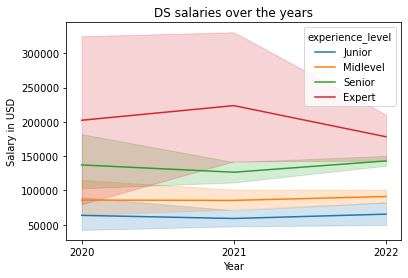

In [9]:
df['work_year'] = df['work_year'].apply(str)
sns.lineplot(x="work_year", y="salary_in_usd",
            hue = 'experience_level',
            data=df).set(title='DS salaries over the years',
                          xlabel = 'Year', ylabel = 'Salary in USD')


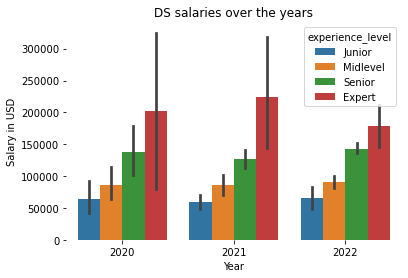

In [10]:
sns.barplot(x="work_year", y="salary_in_usd",
            hue = 'experience_level',
             data=df).set(title='DS salaries over the years',
                          xlabel = 'Year', ylabel = 'Salary in USD')
for spine in plt.gca().spines.values():
    spine.set_visible(False)


Does company size matter for salaries? Perhaps bigger companies can afford higher salaries?



In [11]:
df['company_size']=df["company_size"].replace({'S': 'Small',
                                                'M': 'Medium',
                                                'L': 'Large'})
experience_by_size = df.groupby(['company_size', 'experience_level']).size().reset_index()
experience_by_size


,company_size,experience_level,0
0,Large,Junior,29
1,Large,Midlevel,86
2,Large,Senior,72
3,Large,Expert,11
4,Medium,Junior,30
5,Medium,Midlevel,98
6,Medium,Senior,186
7,Medium,Expert,12
8,Small,Junior,29
9,Small,Midlevel,29


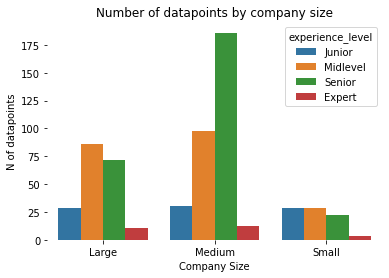

In [13]:
sns.barplot(x="company_size", y=0,
            hue = 'experience_level',
             data=experience_by_size).set(title='Number of datapoints by company size',
                          xlabel = 'Company Size', ylabel = 'N of datapoints')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

In [14]:
company_size = df['company_size'].replace({"Large":3, "Medium": 2, "Small": 1})
salary = df['salary_in_usd']
stats.pearsonr(company_size,salary)

(0.15120545454530898, 0.00018464701639251776)

There's a significant low correlation (larger companies pay better salaries).

Average salary per company size

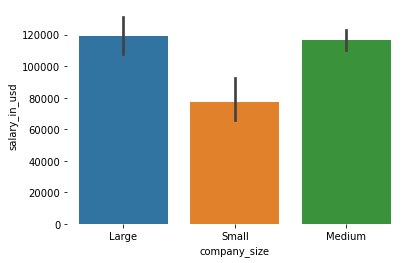

In [16]:
sns.barplot(x = 'company_size',
          y = 'salary_in_usd', data = df)
for spine in plt.gca().spines.values():
    spine.set_visible(False)